In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

### Question 7

In [2]:
data = pd.read_csv('Preprocess_Completed.csv')
mae = data.loc[data['Department'] == 'MAE']
ece = data.loc[data['Department'] == 'ECE']
cse = data.loc[data['Department'] == 'CSE']
bio = data.loc[data['Department'] == 'BENG']

In [4]:
def find_avg_highest_gpa(data, dep):
    '''
    Group by term, average same course number and find all highest course in each terms. 
    After that, average all grade base on same quarter and do bar plot. 
    Note that S1, S2, S3 means summer section 1, 2 and 3; fa means fall, wi means winter, sp means spring

    :param:
      data(pd.DataFrame): whole dataset
      dep(str): department, use to plot
    :return:
      None
    '''
    assert isinstance(data, pd.DataFrame)
    assert isinstance(dep, str)
    high_gpa_over_term = data.groupby(by='Term')  # grouby term
    highest_grade_term = pd.DataFrame(columns=['Term','Avg Grade Received'])
    x_label = []  # save all quarter year
    for quarter, table1 in high_gpa_over_term:
        x_label.append(quarter)
        selected = table1.groupby(["Course Number"])  # groupby course number
        study_over_course = selected.agg({"Avg Grade Received": "mean"}).nlargest(1, "Avg Grade Received") # get mean of gpa for same course number different professor and find largest
        study_over_course['Term'] = quarter[:2]  # save first 2 character for fa, wi, sp, s1, s2 or s3
        highest_grade_term = highest_grade_term.append(study_over_course)

    high_gpa_over_term = highest_grade_term.groupby(by = 'Term')['Avg Grade Received'].mean()  # take average of grade in same quarter
    # plot
    ax = high_gpa_over_term.plot.bar(rot=0, title=dep + ' average highest GPA over quarter', figsize=(20,10))
    ax.title.set_size(20)
    ax.set_xlabel('Quarters', fontsize=16)
    ax.set_ylabel('Received Grades', fontsize=16)
    # add text on plot
    for x,y in zip(range(high_gpa_over_term.shape[0]), high_gpa_over_term.values):
        y = round(y,2)
        label = y
        ax.annotate(label, # this is the text
                   (x,y), # this is the point to label
                   textcoords="offset points", # how to position the text
                   xytext=(0,10), # distance from text to points (x,y)
                   ha='center')

### MAE

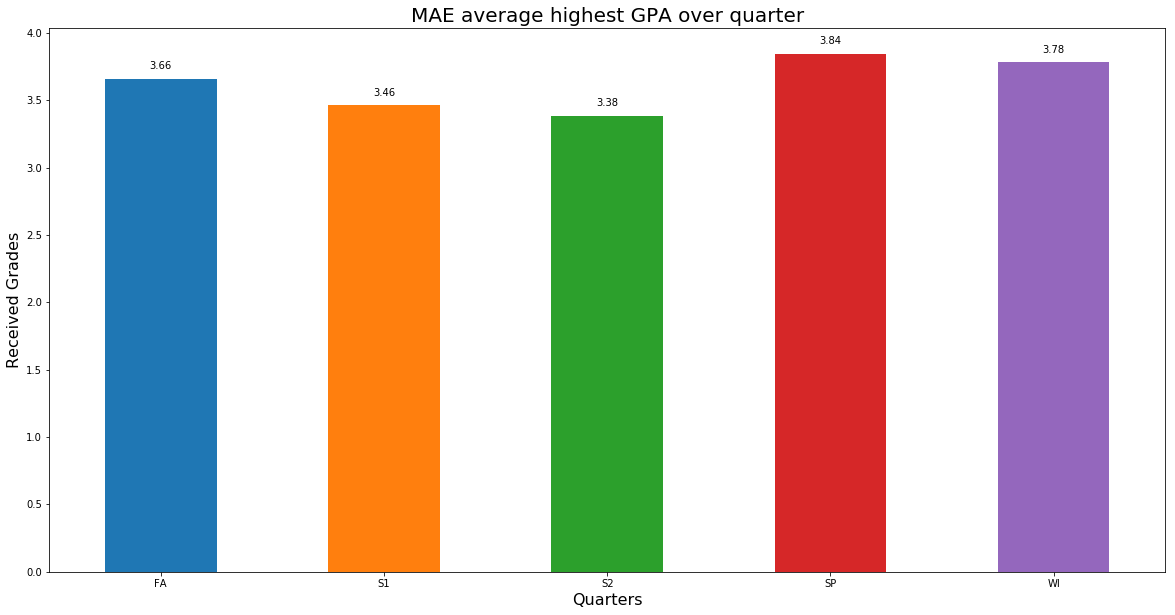

In [7]:
cur_dep = "MAE"
find_avg_highest_gpa(mae, cur_dep)

### ECE

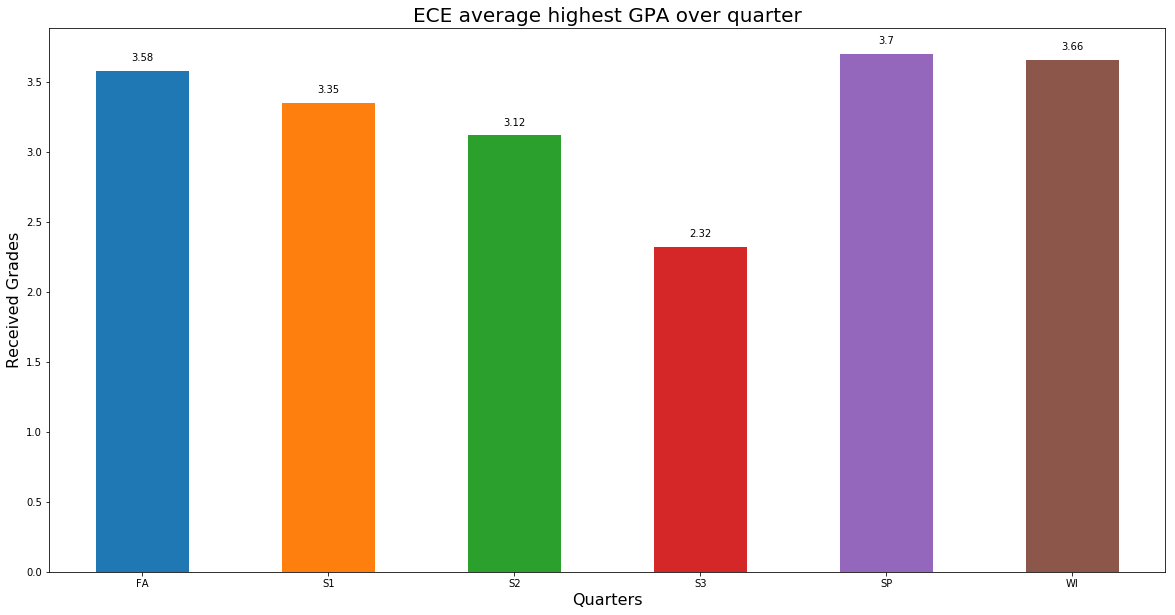

In [8]:
cur_dep = "ECE"
find_avg_highest_gpa(ece, cur_dep)

### CSE

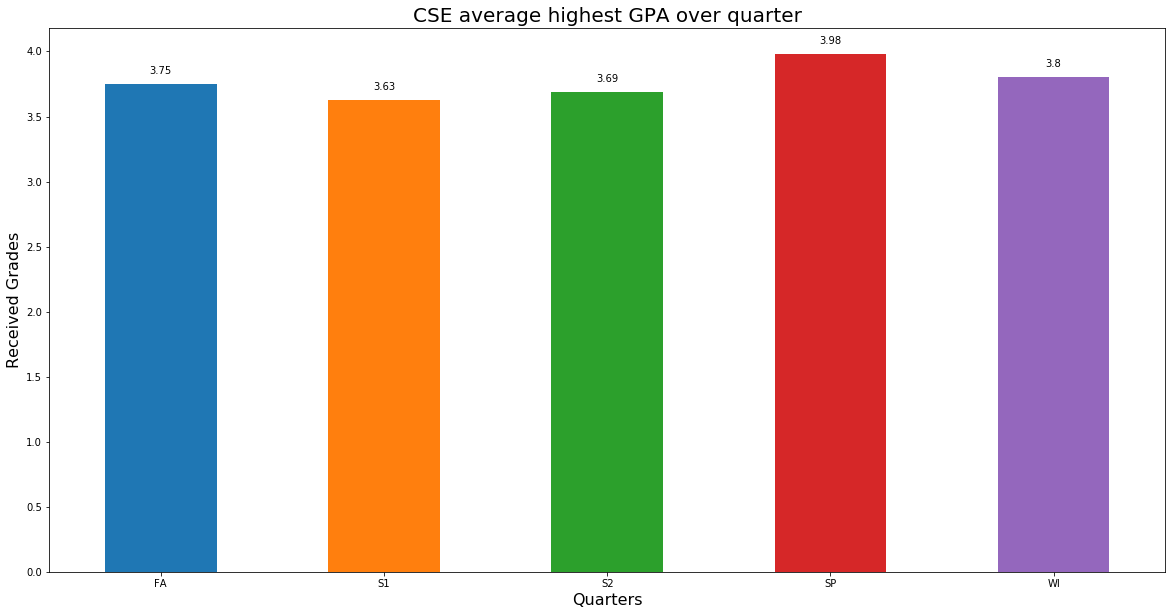

In [9]:
cur_dep = "CSE"
find_avg_highest_gpa(cse, cur_dep)

### BENG

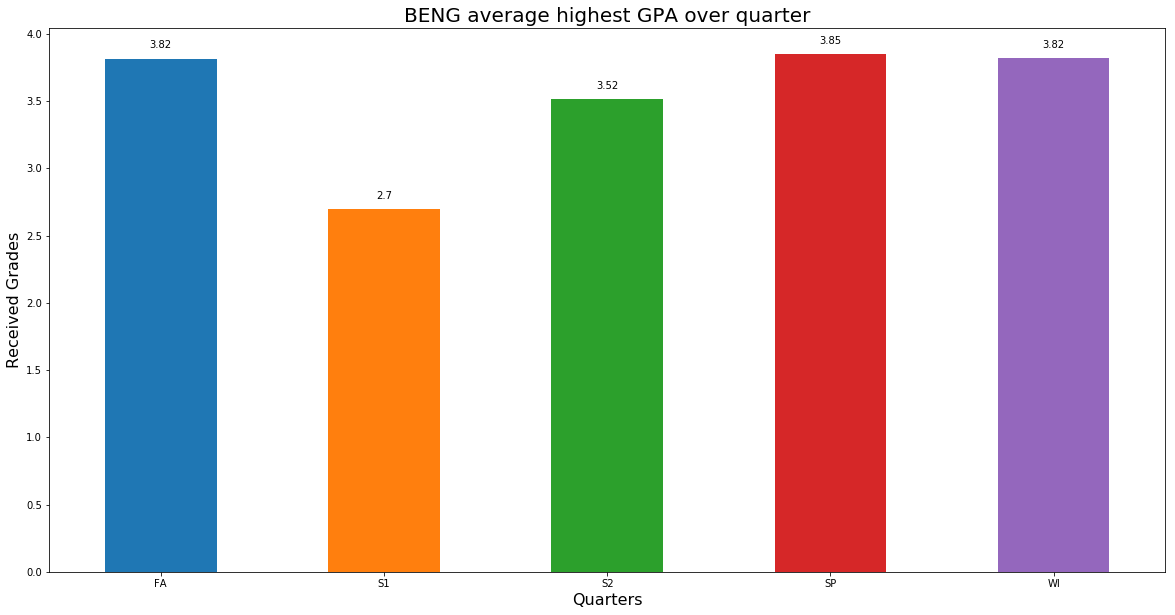

In [10]:
cur_dep = "BENG"
find_avg_highest_gpa(bio, cur_dep)